In [66]:
csv_filepath = 'train.csv'

In [67]:
import pandas as pd

data = pd.read_csv(csv_filepath)

In [68]:
data.shape

(1458644, 11)

In [69]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Data preprocessing starts

In [70]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64

In [71]:
# we need to convert the character variables to numeric

f = lambda x: 0 if x=='N' else 1

data['store_and_fwd_flag'] = data['store_and_fwd_flag'].apply(lambda x: f(x))

In [72]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
0    1450599
1       8045
Name: count, dtype: int64

In [73]:
#converting the datetime strings to datetime

data["dropoff_datetime"] = pd.to_datetime(data["dropoff_datetime"], format = '%Y-%m-%d %H:%M:%S')
data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"], format = '%Y-%m-%d %H:%M:%S')

In [74]:
print(data["dropoff_datetime"].head())
print(data["pickup_datetime"].head())

0   2016-03-14 17:32:30
1   2016-06-12 00:54:38
2   2016-01-19 12:10:48
3   2016-04-06 19:39:40
4   2016-03-26 13:38:10
Name: dropoff_datetime, dtype: datetime64[ns]
0   2016-03-14 17:24:55
1   2016-06-12 00:43:35
2   2016-01-19 11:35:24
3   2016-04-06 19:32:31
4   2016-03-26 13:30:55
Name: pickup_datetime, dtype: datetime64[ns]


In [75]:
# Constructing each variable

data["pickup_month"] = data["pickup_datetime"].dt.month
data["pickup_day"] = data["pickup_datetime"].dt.day
data["pickup_weekday"] = data["pickup_datetime"].dt.weekday
data["pickup_hour"] = data["pickup_datetime"].dt.hour
data["pickup_minute"] = data["pickup_datetime"].dt.minute

data["dropoff_month"] = data["dropoff_datetime"].dt.month
data["dropoff_day"] = data["dropoff_datetime"].dt.day
data["dropoff_weekday"] = data["dropoff_datetime"].dt.weekday
data["dropoff_hour"] = data["dropoff_datetime"].dt.hour
data["dropoff_minute"] = data["dropoff_datetime"].dt.minute

data.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,dropoff_month,dropoff_day,dropoff_weekday,dropoff_hour,dropoff_minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,3,14,0,17,24,3,14,0,17,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,6,12,6,0,43,6,12,6,0,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,1,19,1,11,35,1,19,1,12,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,4,6,2,19,32,4,6,2,19,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,3,26,5,13,30,3,26,5,13,38


In [76]:
data.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'pickup_minute', 'dropoff_month', 'dropoff_day',
       'dropoff_weekday', 'dropoff_hour', 'dropoff_minute'],
      dtype='object')

In [77]:
data["longitude_difference"]= data["dropoff_longitude"] - data["pickup_longitude"]
data["latitude_difference"] = data["dropoff_latitude"] - data["pickup_latitude"]


In [78]:
data["trip_duration"].head(6)

0     455
1     663
2    2124
3     429
4     435
5     443
Name: trip_duration, dtype: int64

In [79]:
data['trip_duration'] = data["trip_duration"].apply(lambda x: (x/60))
data['trip_duration'] = data['trip_duration'].round(3)
data['trip_duration'].head(6)

0     7.583
1    11.050
2    35.400
3     7.150
4     7.250
5     7.383
Name: trip_duration, dtype: float64

In [80]:
data['trip_duration'] = data['trip_duration'].round(3)
data['trip_duration'].head(6)

0     7.583
1    11.050
2    35.400
3     7.150
4     7.250
5     7.383
Name: trip_duration, dtype: float64

In [83]:
# Python program to calculate Distance Between Two Points on Earth
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)
	
	# Haversine formula 
	dlon = lon2 - lon1 
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a)) 
	
	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371
	
	# calculate the result
	return(c * r)


In [ ]:
data['distance_between'] = data.apply(lambda row: distance(row['pickup_latitude'], row['dropoff_latitude'], row['pickup_longitude'], row['dropoff_longitude']), axis=1)
data['distance_between']
#its in kilo meteres

0          1.498521
1          1.805507
2          6.385098
3          1.485498
4          1.188588
             ...   
1458639    1.225080
1458640    6.049836
1458641    7.824606
1458642    1.092564
1458643    1.134042
Name: distance_between, Length: 1458644, dtype: float64

In [85]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'pickup_minute', 'dropoff_month', 'dropoff_day',
       'dropoff_weekday', 'dropoff_hour', 'dropoff_minute',
       'longitude_difference', 'latitude_difference', 'distance_between'],
      dtype='object')

In [86]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_minute,dropoff_month,dropoff_day,dropoff_weekday,dropoff_hour,dropoff_minute,longitude_difference,latitude_difference,distance_between
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,17,24,3,14,0,17,32,0.017525,-0.002335,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,43,6,12,6,0,54,-0.019066,-0.007412,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,11,35,1,19,1,12,10,-0.026306,-0.053852,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,19,32,4,6,2,19,39,-0.002228,-0.013252,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,13,30,3,26,5,13,38,0.000130,-0.010689,1.188588


In [87]:
X = data.drop(["trip_duration","id","vendor_id","pickup_datetime","dropoff_datetime"],axis=1)
y = data["trip_duration"]

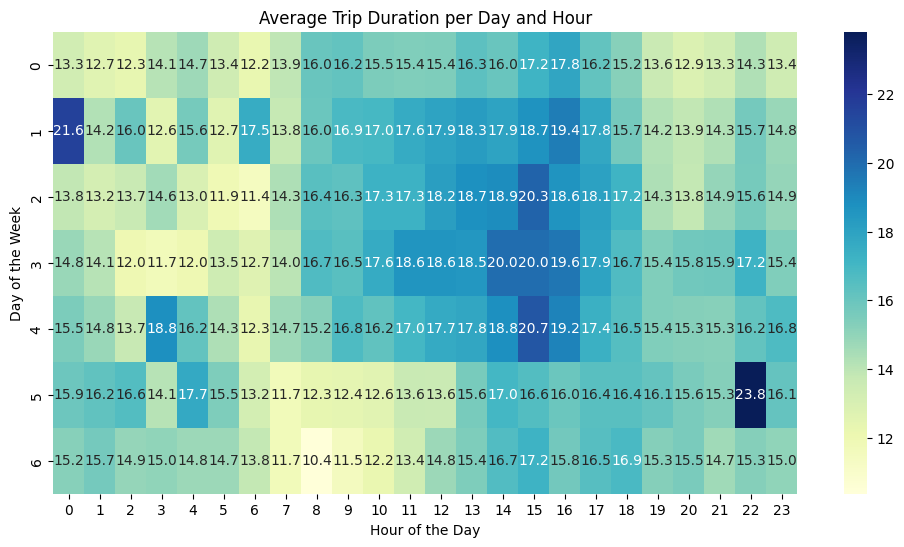

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_duration_per_day_hour = data.groupby(['pickup_weekday', 'pickup_hour'])['trip_duration'].mean().reset_index()

heatmap_data = avg_duration_per_day_hour.pivot(index='pickup_weekday', columns='pickup_hour', values='trip_duration')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Average Trip Duration per Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor

# knn = KNeighborsRegressor(n_neighbors=5)

# knn.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
# knn.score(X_val,y_val)

0.18321770771576662

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# # Define a pipeline with scaling and KNN
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('knn', KNeighborsRegressor())
# ])

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'knn__n_neighbors': [3, 5, 7, 9, 11]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score:", grid_search.best_score_)

# # Evaluate the model on the validation set
# best_model = grid_search.best_estimator_
# val_score = best_model.score(X_val, y_val)
# print("Validation score:", val_score)

Best parameters: {'knn__n_neighbors': 5}
Best cross-validation score: 0.06881807472784698
Validation score: 0.11540038183271828


In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# from sklearn.metrics import r2_score

# # Predict on the test set
# y_pred = rf.predict(X_test)

# # Calculate R-squared
# r2 = r2_score(y_test, y_pred)
# accuracy = r2 * 100  # Convert to percentage
# print(f"Model Accuracy (R-squared): {accuracy:.2f}%")


Model Accuracy (R-squared): 27.98%


In [94]:
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_minute,dropoff_month,dropoff_day,dropoff_weekday,dropoff_hour,dropoff_minute,longitude_difference,latitude_difference,distance_between
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,17,24,3,14,0,17,32,0.017525,-0.002335,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,0,43,6,12,6,0,54,-0.019066,-0.007412,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,11,35,1,19,1,12,10,-0.026306,-0.053852,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,19,32,4,6,2,19,39,-0.002228,-0.013252,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,13,30,3,26,5,13,38,0.000130,-0.010689,1.188588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,...,13,31,4,8,4,13,44,-0.012711,-0.005352,1.225080
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,...,7,35,1,10,6,7,46,0.030762,0.049168,6.049836
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,...,6,57,4,22,4,7,10,-0.045303,-0.061428,7.824606
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,...,15,56,1,5,1,16,2,0.007446,0.008045,1.092564


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor


# # Define pipelines for each model
# pipelines = {
#     'knn': Pipeline([
#         ('scaler', StandardScaler()),
#         ('model', KNeighborsRegressor())
#     ]),
#     'svm': Pipeline([
#         ('scaler', StandardScaler()),
#         ('model', SVR())
#     ]),
#     'rf': Pipeline([
#         ('scaler', StandardScaler()),
#         ('model', RandomForestRegressor(random_state=42))
#     ])
# }

# # Define the parameter grid for GridSearchCV
# param_grids = {
#     'knn': {
#         'model__n_neighbors': [3, 5, 7, 9, 11]
#     },
#     'svm': {
#         'model__C': [0.1, 1, 10, 100],
#         'model__epsilon': [0.01, 0.1, 1]
#     },
#     'rf': {
#         'model__n_estimators': [50, 100, 200],
#         'model__max_depth': [None, 10, 20, 30]
#     }
# }

# # Perform grid search with cross-validation for each model
# best_models = {}
# for name, pipeline in pipelines.items():
#     grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='r2')
#     grid_search.fit(X_train, y_train)
#     best_models[name] = grid_search.best_estimator_
#     print(f"Best parameters for {name}: {grid_search.best_params_}")
#     print(f"Best cross-validation score for {name}: {grid_search.best_score_}")

# # Evaluate the best models on the validation set
# for name, model in best_models.items():
#     val_score = model.score(X_val, y_val)
#     print(f"Validation score for {name}: {val_score}")

Best parameters for knn: {'model__n_neighbors': 5}
Best cross-validation score for knn: 0.06881807472784698
